# Heatmap of counts where models made the same prediction

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

same_prediction_count_csvs = [f for f in os.listdir('.') if f.endswith('same_predictions_count.csv')]
same_prediction_count_csvs

['gradcam_same_predictions_count.csv',
 'integratedgradients_same_predictions_count.csv',
 'kernelshap_same_predictions_count.csv']

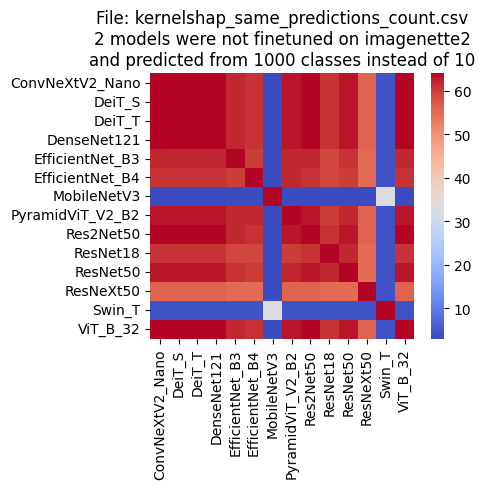

In [2]:
df = pd.read_csv(same_prediction_count_csvs[2], index_col=0)
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df, cmap='coolwarm', ax=ax)
plt.title(f'File: {same_prediction_count_csvs[2]}\n2 models were not finetuned on imagenette2\nand predicted from 1000 classes instead of 10')
fig.tight_layout()
plt.show()

Dropping MobileNetV3 and Swin_T.

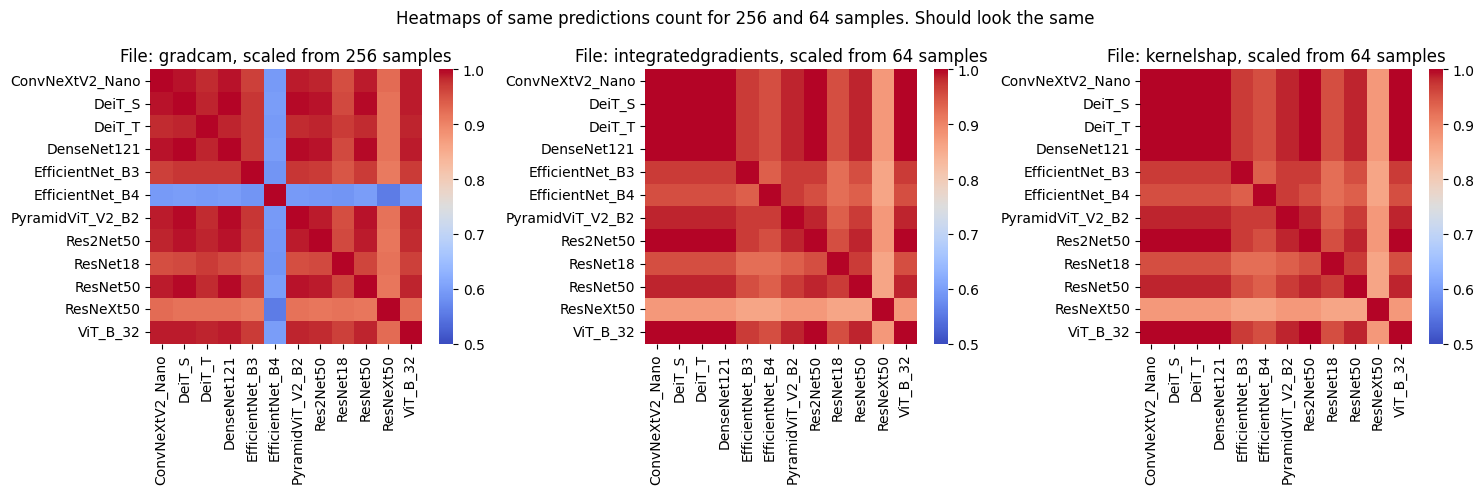

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, csv in enumerate(same_prediction_count_csvs):
    df = pd.read_csv(csv, index_col=0)
    df.drop(columns=['MobileNetV3', 'Swin_T'], inplace=True, index=['MobileNetV3', 'Swin_T'])
    sns.heatmap(df/df.max(), cmap='coolwarm', ax=ax[i], vmin=0.5, vmax=1)
    ax[i].set_title(f'File: {csv.split("_")[0]}, scaled from {df.max().iloc[0]} samples')
plt.suptitle('Heatmaps of same predictions count for 256 and 64 samples. Should look the same')
fig.tight_layout()
plt.show()

# PCA from similarity matrices

In [4]:
import os
curdir = os.getcwd()
os.chdir('../../codes/')
from src.utils import models_to_architecture_mapping
os.chdir(curdir)

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

def plot_pca(df, title, output_filename=None, models_to_architecture_mapping=models_to_architecture_mapping):
    df_distances = 1 - df
    pca = PCA(n_components=2)
    pca.fit(df_distances)
    df_distances_pca = pd.DataFrame(pca.transform(df_distances), index=df_distances.index, columns=['PC1', 'PC2'])

    df_distances_pca['architecture'] = df_distances_pca.index.map(models_to_architecture_mapping)
    pc1_min_max, pc2_min_max = (df_distances_pca[['PC1']].max().values[0] - df_distances_pca[['PC1']].min()).values[0], (df_distances_pca[['PC2']].max().values[0] - df_distances_pca[['PC2']].min()).values[0]
    plt.scatter(df_distances_pca['PC1'], df_distances_pca['PC2'], c=df_distances_pca['architecture'].map({'transformer': 'blue', 'CNN': 'red'}))
    for i, txt in enumerate(df_distances_pca.index):
        plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+pc1_min_max*0.01, df_distances_pca['PC2'].iloc[i]+pc2_min_max*0.01))
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(title)
    plt.legend(handles=[
        plt.Line2D([0], [0], marker='o', color='w', label='transformer', markerfacecolor='blue', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='CNN', markerfacecolor='red', markersize=10)
    ])
    plt.tight_layout()
    if output_filename:
        plt.savefig(output_filename)
    plt.show()


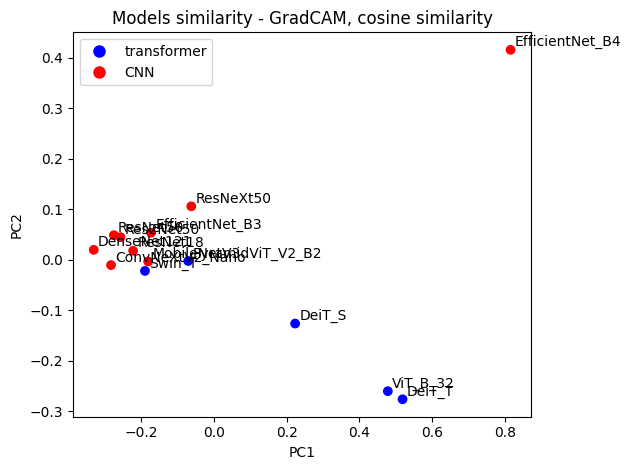

In [6]:
similarity_matriced_csvs = [f for f in os.listdir('.') if f.endswith('.csv') and f.startswith('similarity_matrix')]
df = pd.read_csv(similarity_matriced_csvs[0], index_col=0)
plot_pca(df, title="Models similarity - GradCAM, cosine similarity")

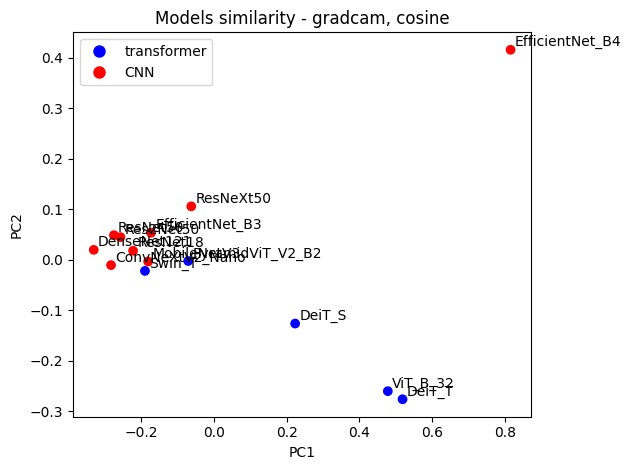

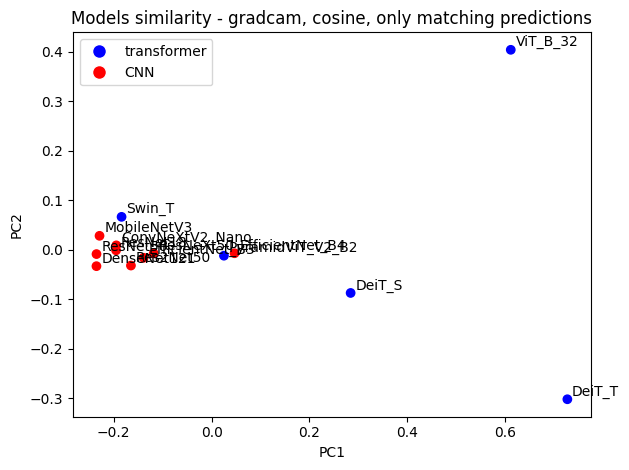

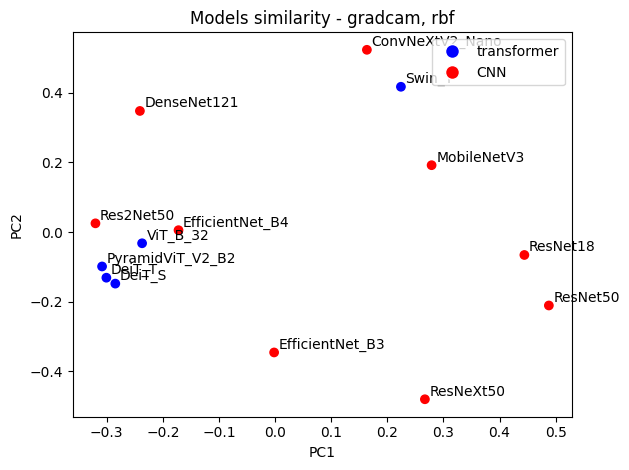

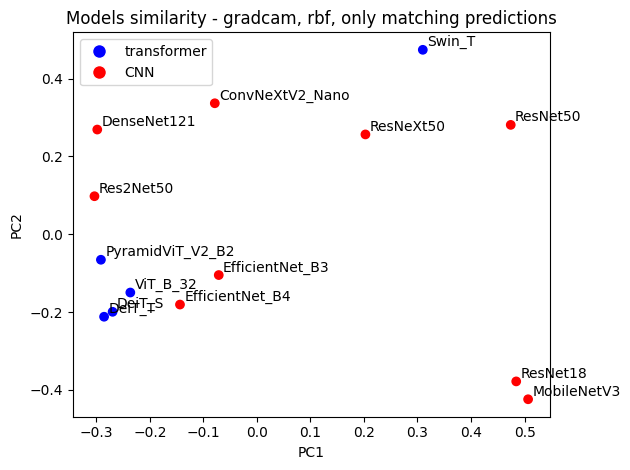

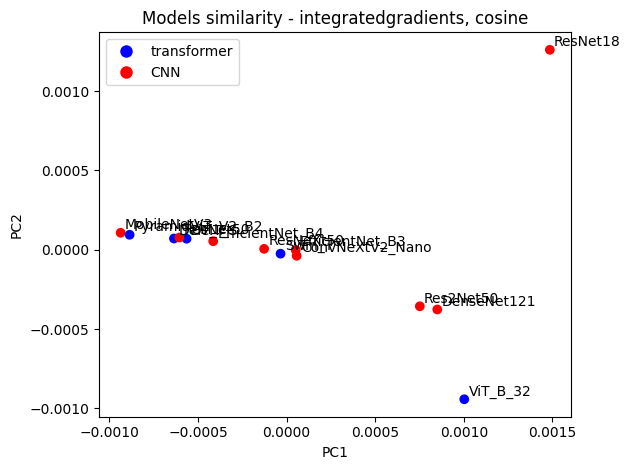

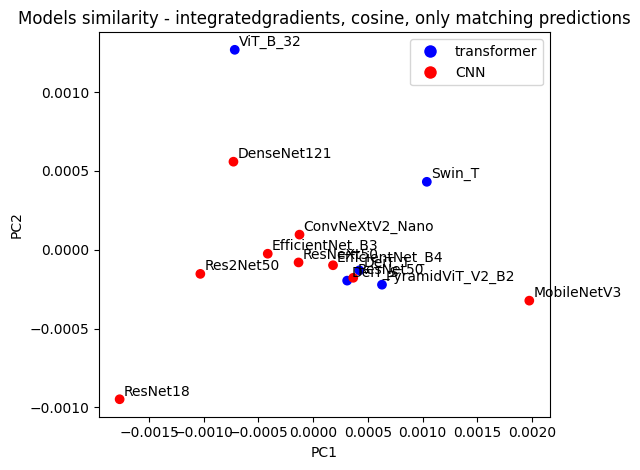

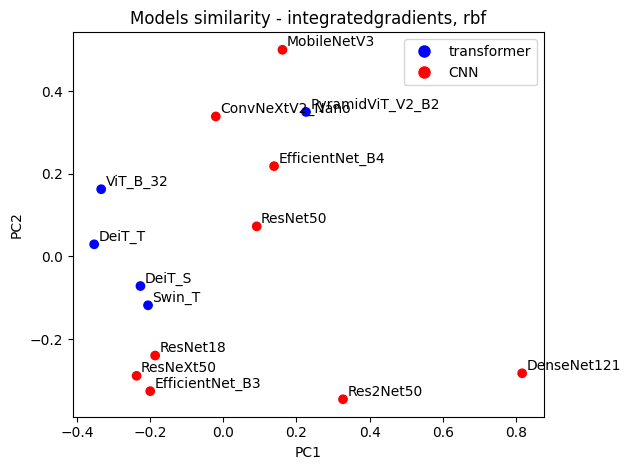

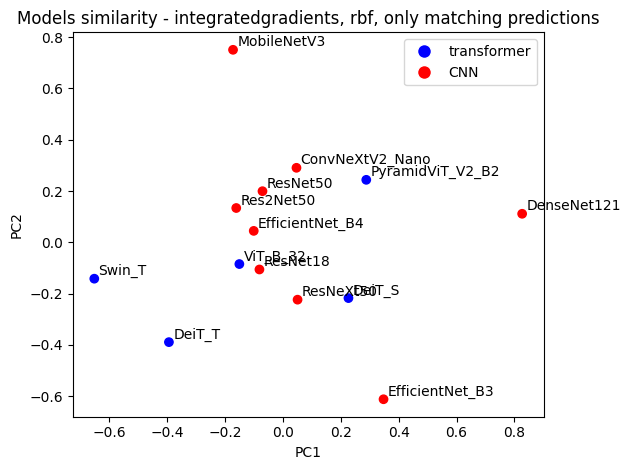

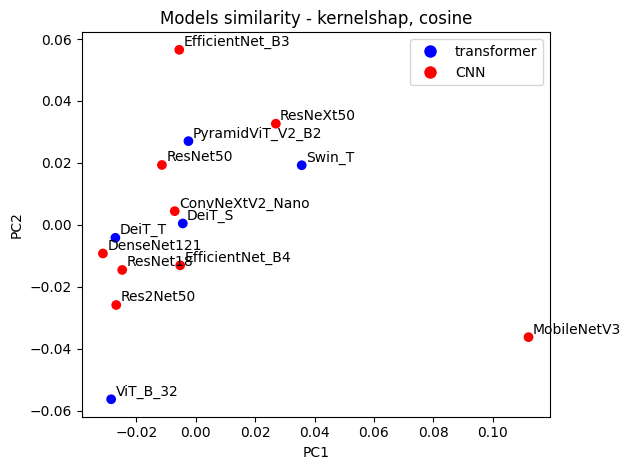

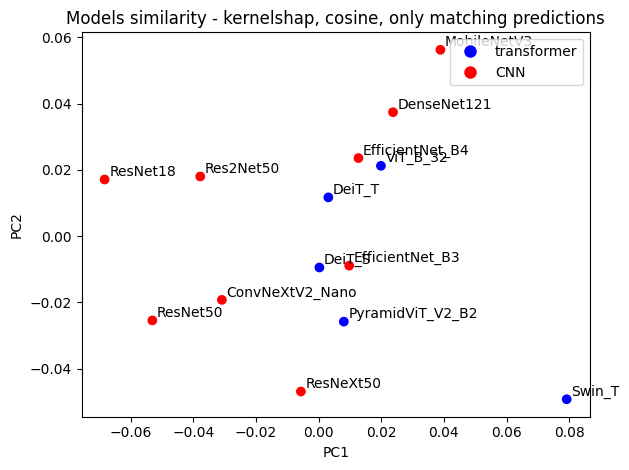

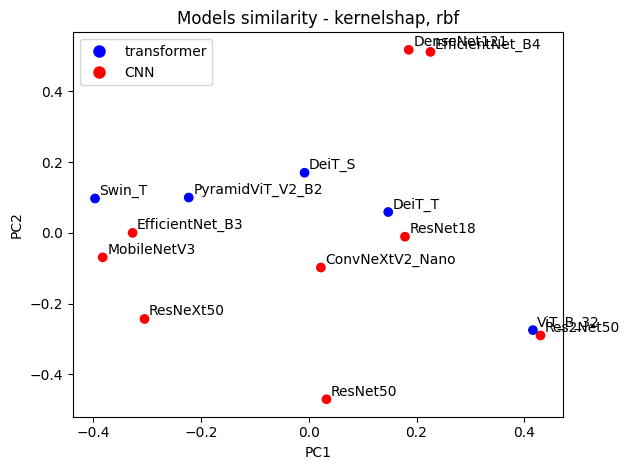

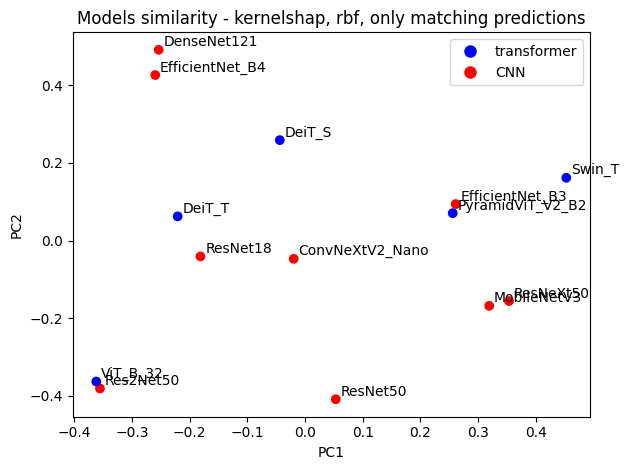

In [7]:
for csv_name in similarity_matriced_csvs:
    splitted = csv_name.split('_')
    explanation_method, similarity_metric = splitted[2], splitted[3].split('.')[0]
    title = f"Models similarity - {explanation_method}, {similarity_metric}"
    if "only_matching" in csv_name:
        title += ", only matching predictions"
        output_filename = f'pca_{explanation_method}_{similarity_metric}_only_matching.png'
    else:
        output_filename = f'pca_{explanation_method}_{similarity_metric}_all.png'
    df = pd.read_csv(csv_name, index_col=0)
    plot_pca(df, title=title, output_filename=output_filename)

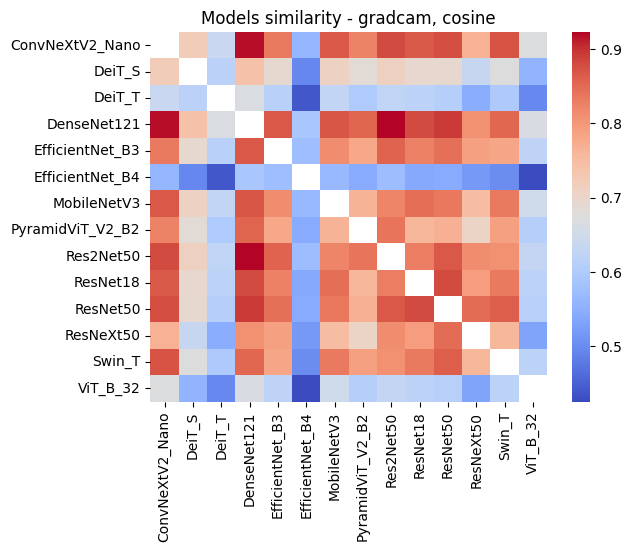

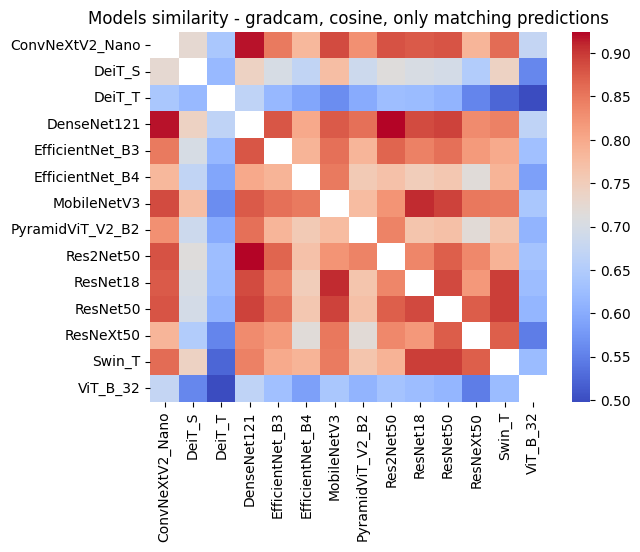

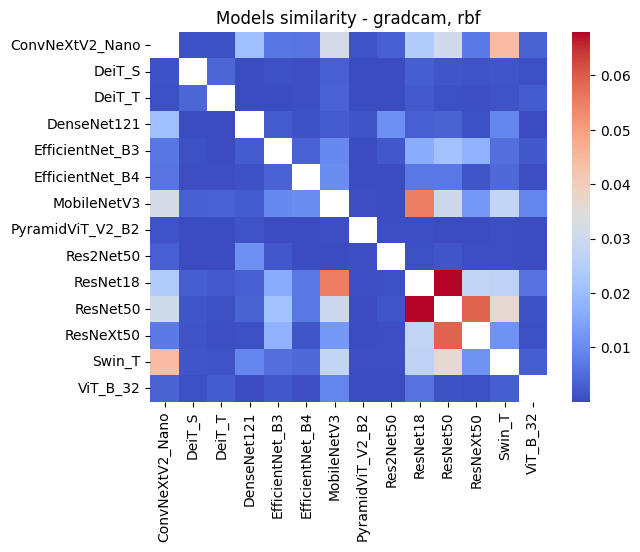

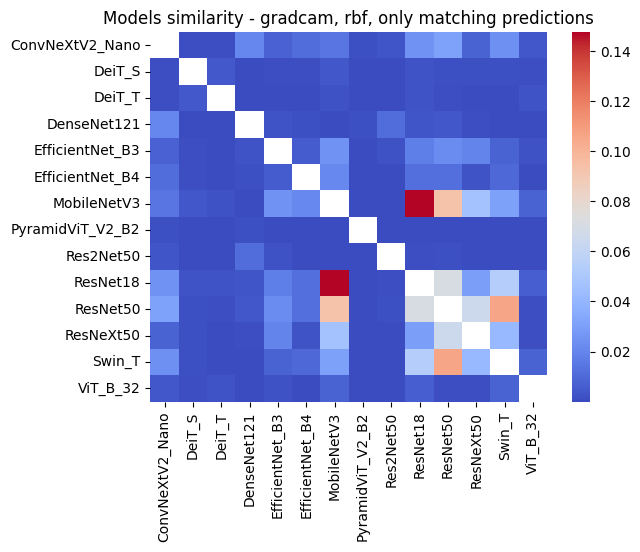

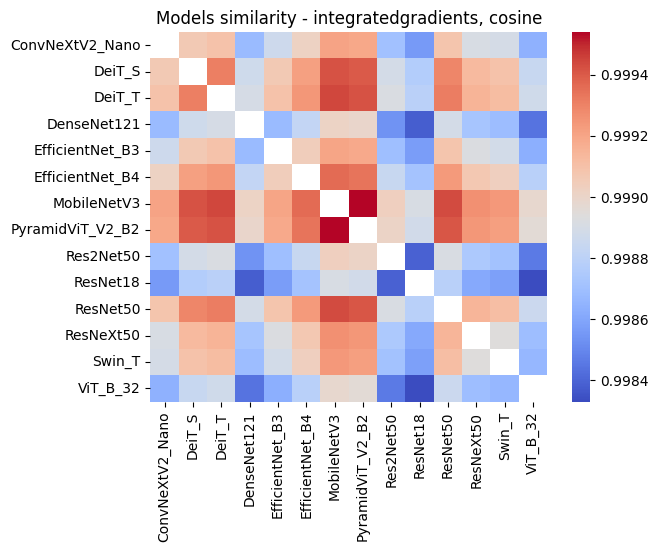

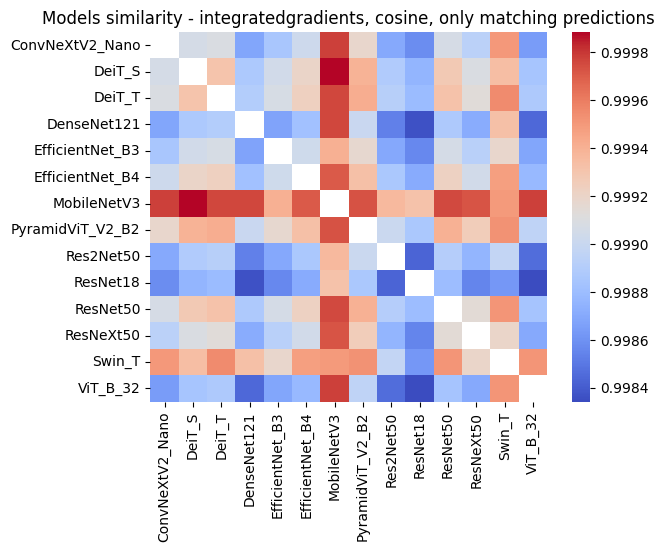

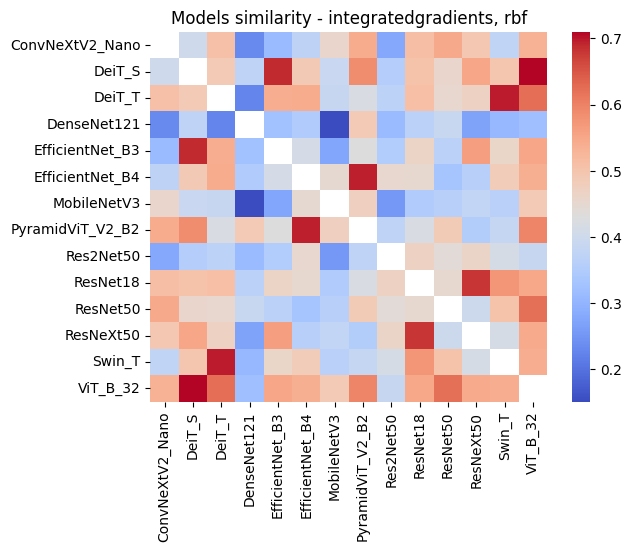

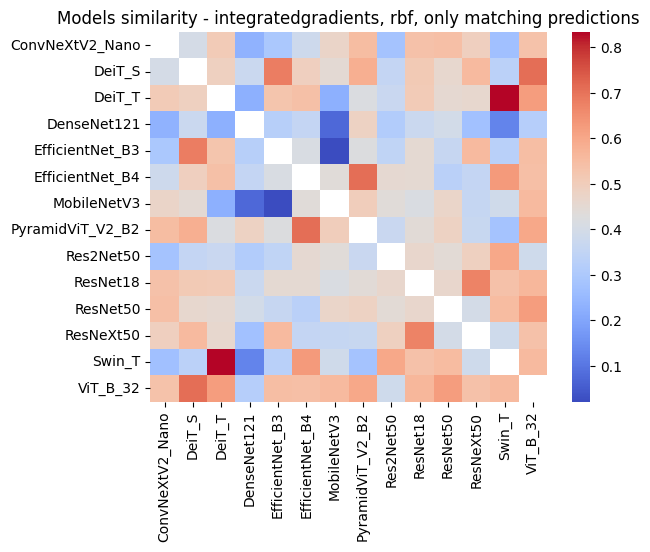

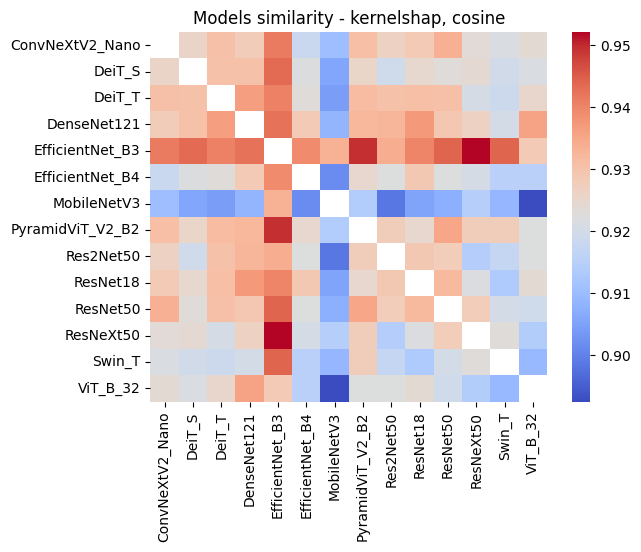

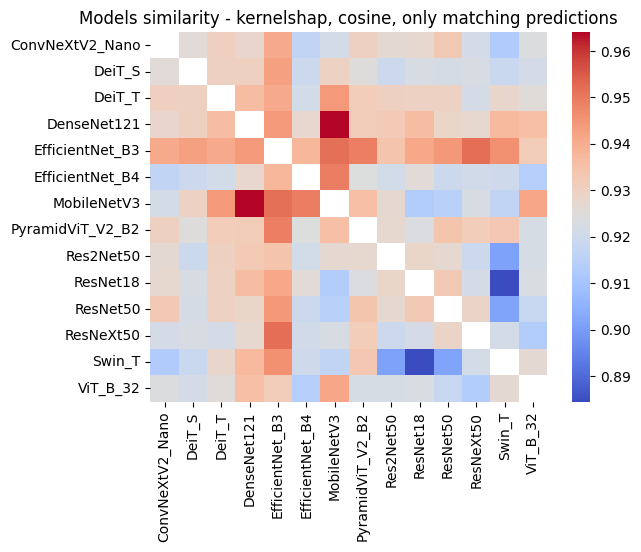

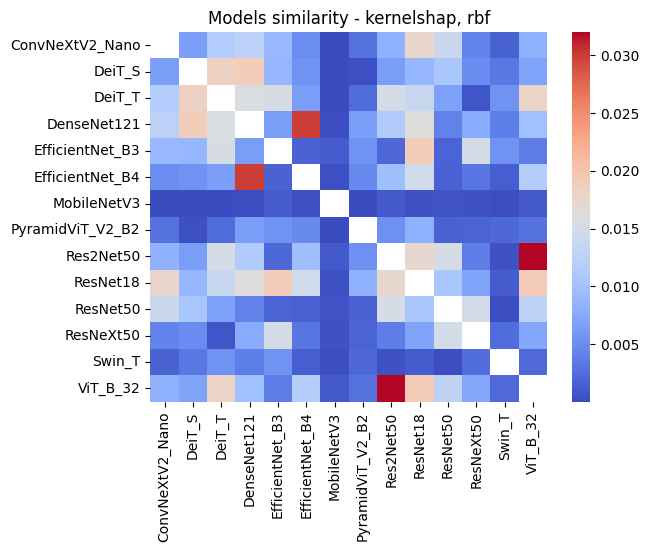

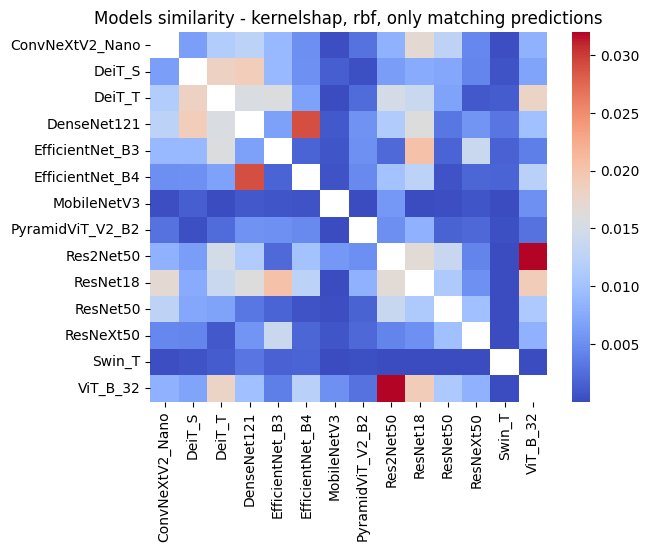

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# plot heatmap
def plot_heatmap(df, title):
    mask = np.eye(df.shape[0], dtype=bool)
    sns.heatmap(df, mask=mask, cmap='coolwarm')
    plt.title(title)
    plt.show()

for csv_name in similarity_matriced_csvs:
    splitted = csv_name.split('_')
    explanation_method, similarity_metric = splitted[2], splitted[3].split('.')[0]
    title = f"Models similarity - {explanation_method}, {similarity_metric}"
    if "only_matching" in csv_name:
        title += ", only matching predictions"
    df = pd.read_csv(csv_name, index_col=0)
    plot_heatmap(df, title=title)